In [3]:
from py5canvas import *

This function does bla bla

In [13]:
def micro_x_variation(draw_pass, current_x):
    x_var_loc = 7
    x_var_scale = 12

    centre = micro_pos[draw_pass - 1]
    sigma = width/5 # gaussian apllication of dynamics  either side of centre x value per pass
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05

    x_var_loc = abs(gaussian_weight * np.random.normal(7,5)) # 13,10
    x_var_scale = abs(gaussian_weight * np.random.normal(9,7)) # 19,15

    return [x_var_loc, x_var_scale]

2 [540, 0, 360, 360, 0, 720, 540, 900, 0, 0, 180]


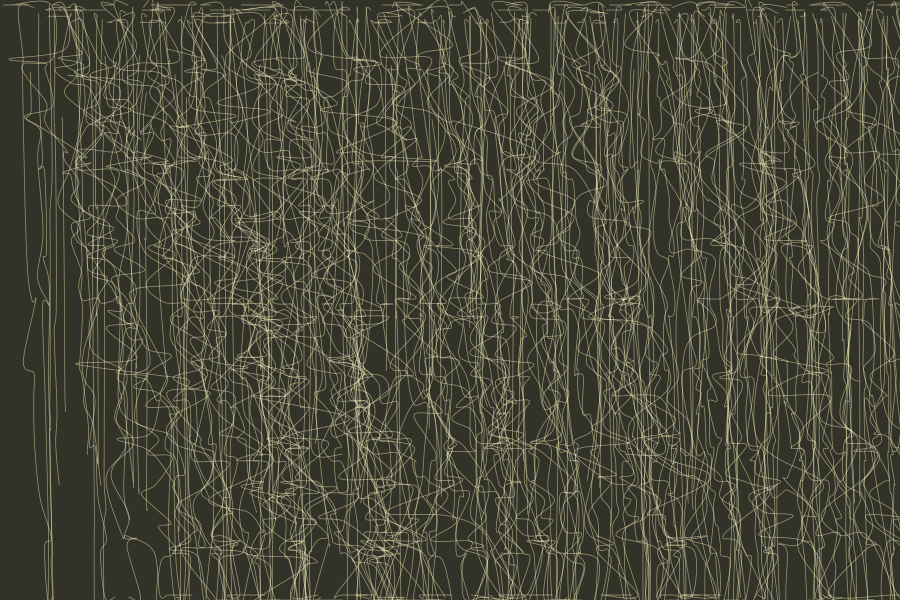

In [ ]:
import random
import numpy as np

create_canvas(900, 600)

# no_fill()
# background(33,33,22)
# background(50,50,40)
# fill(255,255,200,200)
# stroke(255,255,200,100)
background(50,50,40)
fill(250,255,200,125)
stroke(255,255,200,125)
# stroke(150,200,100,233)
stroke_weight(0.33)

line_spacing = 22 # distance the vertical lines are apart

# initial pen position
x, y = 0, 0

def draw_line(x_bias, x_random, sum_lin):
    # Draws a curve connecting a list points [[x1, y1], [x2, y2], ...]
    stroke_weight(0.75)
    no_fill() # stops lines being filled in as a shape
    begin_shape()
    for i in range(len(sum_lin)):
        curve_vertex(x + x_random[i] + x_bias[i], sum_lin[i] + y_offset)
    end_shape()

polyrhythm_nodes = [8,10,11,12,15] # 15:12:11:10:8 polyrhythm
# [24,27,30,33,36,40,45] # full scale cluster ratios - 1 2 3 ^4 5 6 7
line_calcs = []
summed_line = []

def calc_lines(): # separate into 2 functions calc and sum - better modularity?
    global line_calcs, summed_line

    line_calcs = []
    summed_line = []

    for lin in range(int(width/line_spacing)):
        summed_line.append([]) # create new nested array for each line
        
        # calculate y values for each component pulse in the polyrhythm 
        for i in range(len(polyrhythm_nodes)):
            calc_y = 5
            line_calcs.append([])
            for j in range(polyrhythm_nodes[i]):
                line_calcs[i].append(calc_y)
                calc_y += int((height-10)/polyrhythm_nodes[i])
                # print(calc_y)

        # sum calculated line nodes (todo: sum rhythms/patterns expressed via x vals) into 1 line
        for i in range(len(polyrhythm_nodes)):
            for j in range(polyrhythm_nodes[i]):
            # 1/3 chance that a pulse is selected for use per component pulse - random pattern generation
                node_select = np.random.normal(1.167,1.167) # resolution of polyrhthm - was random.uniform(0,2.33)
                # print(node_select) 
                node_chance = micro_node_density(draw_pass,x) + macro_node_density(draw_pass)
                if node_select < node_chance: 
                    summed_line[lin].append(line_calcs[i][j])

            if node_select < node_chance: 
                summed_line[lin].append(height-5)   

        summed_line[lin].sort() # not necessary, but good for readability 

macro_pos = 0
micro_pos = []
def dynamic_form(passes):
    fifths = [0,1,2,3,4,5]

    macro_pos = int((passes/5) * random_choice(fifths)) # gives which pass to centre gaussian dynamic peak on

    for p in range(passes): # do for each pass
        micro_pos.append(int((width/5) * random.choice(fifths)))

    print(macro_pos, micro_pos)
            
    return [macro_pos, micro_pos] 

def gaussian_field(current_pos, centre, range):
    return np.exp(-((current_pos - centre)**2) / (2 * range**2)) # calculate gaussian field centred on determined x position per pass

# include default values that prevent lines from being dead straight - if gaussian_weight < 0.1(for e.g.): x & node = default vals
# also use dynamics to change bias (drift) of lines?

# dynamic variations across all passes of the canvas

def macro_x_variation(draw_pass):
    x_var_loc = 0
    x_var_scale = 0

    centre = macro_pos
    sigma = 2
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    
    # prevent lines from becoming totally straight/nodeless by keeping gaussian_weight away from ~0.0
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    x_var_loc = abs(gaussian_weight * np.random.normal(3, 2)) # 11,6
    x_var_scale = abs(gaussian_weight * np.random.normal(5, 4)) # 19,12

    # print(x_var_loc, x_var_scale)

    return [x_var_loc, x_var_scale]

def macro_line_drift(draw_pass):
    x_bias_loc = 0
    x_bias_scale = 0

    dec_line_spacing = 0

    # dynamically decrease line_spacing along with increased drift

    centre = macro_pos
    sigma = 2
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    
    # prevent lines from becoming totally straight/nodeless by keeping gaussian_weight away from ~0.0
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    x_bias_loc = abs(gaussian_weight * np.random.normal(1.5, 1)) 
    x_bias_scale = abs(gaussian_weight * np.random.normal(2, 1)) 

    dec_line_spacing = abs(gaussian_weight * np.random.normal(5.5, 2)) # at highest dynamics no. to detract from line_spacing

    return [x_bias_loc, x_bias_scale, dec_line_spacing]

def macro_node_density(draw_pass):
    node_density = 0.0

    centre = macro_pos
    sigma = 2 # width of gaussian bell curve applied to passes of canvas (effect either side of centre pass)
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    # print(gaussian_weight)
    
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    node_density = abs(gaussian_weight * np.random.normal(0.5,0.33)) # 0.5,0.33

    return node_density

# dynamic variations per individual pass of the canvas

def micro_x_variation(draw_pass, current_x):
    x_var_loc = 7
    x_var_scale = 12

    centre = micro_pos[draw_pass - 1]
    sigma = width/5 # gaussian apllication of dynamics  either side of centre x value per pass
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05

    x_var_loc = abs(gaussian_weight * np.random.normal(7,5)) # 13,10
    x_var_scale = abs(gaussian_weight * np.random.normal(9,7)) # 19,15

    return [x_var_loc, x_var_scale]

def micro_line_drift(draw_pass, current_x):
    x_bias_loc = 0.75
    x_bias_scale = 1.5

    dec_line_spacing = 0

    centre = micro_pos[draw_pass - 1]
    sigma = width/5
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05

    x_bias_loc = abs(gaussian_weight * np.random.normal(2,4))
    x_bias_scale = abs(gaussian_weight * np.random.normal(4,3))

    dec_line_spacing = abs(gaussian_weight * np.random.normal(5.5, 2))

    return [x_bias_loc, x_bias_scale, dec_line_spacing]


def micro_node_density(draw_pass, current_x):
    node_density = 1.0
        
    centre = micro_pos[draw_pass - 1]
    sigma = width/5
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05
    
    node_density = abs(gaussian_weight * np.random.normal(1.5, 0.5)) # 1.5, 0.5

    # print(node_density)

    return node_density

y_offset = 0
def draw_circles():
    global x, line_spacing

    # r_val = 170
    # g_val = 186
    # b_val = 80
    # alpha_val = 155

    # macro_bias_space = macro_line_drift(draw_pass)[2]

    # line_spacing = int(22 - macro_bias_space) # add init_line_spacing variable?

    for lin in range(int(width/line_spacing)):
        # line-node variation
        x_random = []

        # line-node drift
        x_bias = []
        bias_random = 0 
        micro_bias_space = micro_line_drift(draw_pass,x)[2]

        line_spacing = int(22 - micro_bias_space) # add init_line_spacing variable?

        # print(line_spacing)

        for i in range(len(summed_line[lin])):
            # stroke(r_val, g_val, 80, alpha_val)

            # only call macro once outside of loop, then call once here? - not needed, calling mult times won't regenerate peak
            x_var_loc = micro_x_variation(draw_pass,x)[0] + macro_x_variation(draw_pass)[0]
            x_var_scale = micro_x_variation(draw_pass,x)[1] + macro_x_variation(draw_pass)[1]

            x_bias_loc = micro_line_drift(draw_pass,x)[0] + macro_line_drift(draw_pass)[0]
            x_bias_scale = micro_line_drift(draw_pass,x)[1] + macro_line_drift(draw_pass)[1]
            # make more efficient by only calling functions once? (store returned vals in arrays?)

            # print(x_var_loc, x_var_scale)

            x_random.append(np.random.normal(x_var_loc, x_var_scale)) 
            # generate randomised x vals, the same for each circle and equiv line bend and store in list

            bias_random += np.random.normal(x_bias_loc, x_bias_scale)
            x_bias.append(x + bias_random) # try to give lines trajectory towards to the right as the line progressses
            
            stroke_weight(1)
            # fill(r_val, g_val, b_val, alpha_val)
            # circle(x + x_random[i] + x_bias[i], summed_line[lin][i] + y_offset, np.random.normal(1,0.5))
            # r_val -= 0.1
            # g_val += 0.02
            # b_val += 0.2
            # alpha_val -= 0.05
            # print(r_val, g_val, b_val, alpha_val)

        # after adding x_bias to make lines drift to the right - line spacing seems to be affected, with the score appearing sparser
        # however, the x values appear un affected

        draw_line(x_bias, x_random, summed_line[lin])
        # store all x values for a line to be called at once in the draw_line() loop per line

        # move to the right
        x += line_spacing

num_passes = 11
draw_pass = 0
def draw_passes():
    global x, y_offset, draw_pass, alpha_val

    x_init = 5
    x_offset = 0

    x = x_init

    dynamic_form(num_passes)
    
    while draw_pass < num_passes: # higher than division of ~line_spacing to cause overlap
        calc_lines()

        # alpha_val -= 5
        draw_circles()
        #draw_text()
        # save(f'images/per_pass_score/07_score_pass_24_polyrhythm_{draw_pass}.png') # save image for each pass
        
        draw_pass += 1
        x_offset += (line_spacing*1.104)/7 # adding some interesting displacement in overlap
        y_offset += random.uniform(-1, 3) # np.random.normal(1,2)
        x = x_init + x_offset

        # print(f"pass made {draw_pass}")

# save('images/no_dotes_sparse_131115.png')
    
draw_passes()

show()

# use numpy to make run quicker - good at proccessing values via arrays more quickly and effieciently than vanilla python
# fix occasional spline error - usually coincides with higher numbers/ranges in random func params
# possibly use perlin noise ("big clouds") to determine dynamics (or a new element - line dotting/breaking?)
# use heptatonic cluster ratios as basis x values instead of line_spacing over width/polyrhythm_node list for width of canvas

# ----- 04 12 25

# change framing/format of it
# longer horizontally?
# different shape? rounder?
# draw outside of frame and show?
# scrollable
# chose where to start and end performance from long score?
# - if longer add more dynamics overtime

# more vertical dynamics?
# more dynamic variation?

# project 3d/4d on to 2d plane and draw beyond frame? use 3rd dimension as 4th?

# score part two - diptich

## instructions and poetic lines

concept:

- provide instructions to interpret the other part of graphic score
- using words to convey the conscept and atmosphere of the piece
- ulitmately layer enough words that this itself becomes a graphic score
  - possibly resembling foliage or something of the like

- to be drawn at the same time as the other part of the score

- either start with instructions before adding poetic lines OR interweave instructions and poetic lines by chance
  - OR middle way - interweave instructions and poetic lines with the chance of instructions weighted more hevaily at the start and lessening with time

- use my reformed writing system for greater emphasis on sounds, aesthetics and obfuscation of meaning to most performers of the score

arrangement:

- arrange using polyrhythms
- weight to polyrhythm nodes of previous score using gaussian distribution centred on the nodes
- for y values (text pos top to bottom) - use the polyrhythm 15:12:11:10:8 from before 
- for x vals (text pos side to side) - use full scale cluster polyrhythm of notes 1 2 3 ^4 5 6 7: 
  - 1:1 9:8 5:4 11:8 3:2 5:3 15:8 - all factors of 8, except 5:3 - need to be x:24 to align - 5:3 * 8 = 40:24
  - 8:8 9:8 10:8 11:8 12:8 15:8 
  - 24:24 27:24 30:24 33:24 36:24 40:24 45:24 (48:24 - octave)

poetic lines: 

- can be generated by piecing together a set of found phrases and vocubulary (similar to how I write mesostics, but without the mesostic ruleset?)

# alternative - ascii foliage

- generate ascii structures mimicking foliage

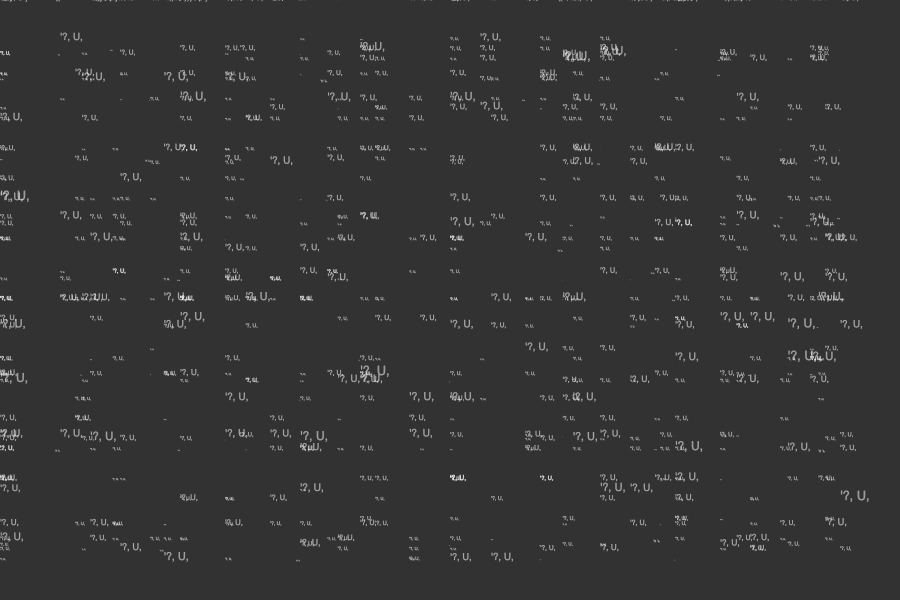

In [6]:
import random
import numpy as np

create_canvas(900, 600)

background(50,50,50)
fill(255,255,255,125)
stroke(255,255,255,125)
stroke_weight(0.33)

# write instructions for interpretation of graphic score
# write in non_linear order

def determine_pos(): # use gaussian distrtibution centered on node vals
    x_nodes = [24,27,30,33,36,40,45]  # harmonic relationship between intervals in cluster of full scale: 1 2 3 ^4 5 6 7
    y_nodes = [8,10,11,12,15] # harmonic relationship between intervals in maj7add^4 chord, built from subscale: 1 3 ^4 5 7
    # the '^' in ^4 represents a half-sharp - as in half-sharp fourth or up-fourth (interval of ~551¢

    x_node_select = random.choice(y_nodes)
    x_div = width/x_node_select
    x_pos = x_div * int(random.uniform(0, x_node_select))

    y_node_select = random.choice(y_nodes)
    y_div = height/y_node_select
    y_pos = y_div * int(random.uniform(0, y_node_select))

    # print(x_pos, y_pos)

    return [x_pos, y_pos]

determine_pos()

# list of strings containing instructions for interpreting the scores
instructions = [
    "pley disėnding patens and glissandi",
    "þinc ebaut þe tėxċer ov casceiding lait",
    "elaw yō finges tu rȧn euver it",
    "yu ā sėreneiding þe leit aftenūn sȧnlait"
]

poetic_lines = [
    # list of strings containing poetic lines or possible fragments to piece together into them (then rename as poetic_fragments)
]

# use gaussian weighting to determing which group of strings to draw from 
# - or rather purely a descending probability following the same or a similar exponential curve

# possibly create function to piece together fragments into poetic lines?
# - or just use raw fragments

# create function to determine position of text based on x and y nodes
# bias to begin from top right to bottom left?

# iterate over string to draw letter by letter, as instruction for the drawing machine
# - better yet, chose characters of string in a random order

def draw_text():
    count = 0
    while count < 200:
        text_size(np.random.normal(5, 3))
        for i in range(len(instructions)):   
            pos = determine_pos()
            # print(pos[0], pos[1])
            # text(instructions[i], pos[0], pos[1])
            # circle(pos[0], pos[1], np.random.normal(1,0.5)) 
            text("'ʔ, U,", pos[0], pos[1])
            # randomly (or w/ weighting) select from list of appropriate ascii?
            # use gaussian dist/randomisation/NOISE around x and y to create clusters
        count += 1

draw_text()

show()

11 [900, 900, 540, 0, 900, 360, 540, 720, 900, 0, 540]


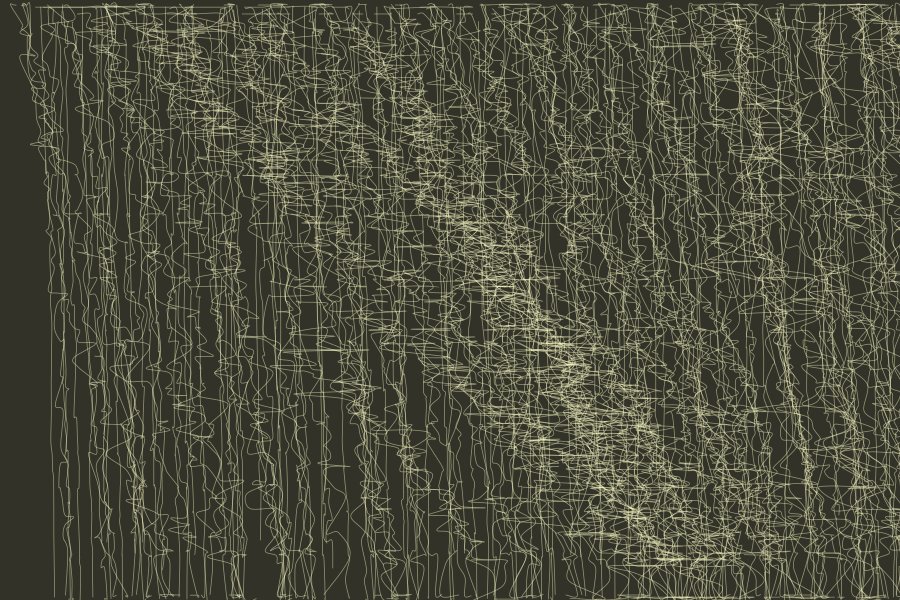

In [12]:
import random
import numpy as np

create_canvas(900, 600)

# no_fill()
# background(33,33,22)
# background(50,50,40)
# fill(255,255,200,200)
# stroke(255,255,200,100)
background(50,50,40)
fill(250,255,200,125)
stroke(255,255,200,125)
# stroke(150,200,100,233)
stroke_weight(0.33)

line_spacing = 22 # distance the vertical lines are apart

# initial pen position
x, y = 0, 0

def draw_line(x_bias, x_random, sum_lin):
    # Draws a curve connecting a list points [[x1, y1], [x2, y2], ...]
    stroke_weight(0.75)
    no_fill() # stops lines being filled in as a shape
    begin_shape()
    for i in range(len(sum_lin)):
        curve_vertex(x + x_random[i] + x_bias[i], sum_lin[i] + y_offset)
    end_shape()

polyrhythm_nodes = [24,27,30,33,36,40,45] # 15:12:11:10:8 polyrhythm
# [24,27,30,33,36,40,45] # full scale cluster ratios - 1 2 3 ^4 5 6 7
line_calcs = []
summed_line = []

def calc_lines(): # separate into 2 functions calc and sum - better modularity?
    global line_calcs, summed_line

    line_calcs = []
    summed_line = []

    for lin in range(int(width/line_spacing)):
        summed_line.append([]) # create new nested array for each line
        
        # calculate y values for each component pulse in the polyrhythm 
        for i in range(len(polyrhythm_nodes)):
            calc_y = 5
            line_calcs.append([])
            for j in range(polyrhythm_nodes[i]):
                line_calcs[i].append(calc_y)
                calc_y += int((height-10)/polyrhythm_nodes[i])
                # print(calc_y)

        # sum calculated line nodes (todo: sum rhythms/patterns expressed via x vals) into 1 line
        for i in range(len(polyrhythm_nodes)):
            for j in range(polyrhythm_nodes[i]):
            # 1/3 chance that a pulse is selected for use per component pulse - random pattern generation
                node_select = np.random.normal(1.167,1.167) # resolution of polyrhthm - was random.uniform(0,2.33)
                # print(node_select) 
                node_chance = micro_node_density(draw_pass,x) + macro_node_density(draw_pass)
                if node_select < node_chance: 
                    summed_line[lin].append(line_calcs[i][j])

            if node_select < node_chance: 
                summed_line[lin].append(height-5)   

        summed_line[lin].sort() # not necessary, but good for readability 

macro_pos = 0
micro_pos = []
def dynamic_form(passes):
    fifths = [0,1,2,3,4,5]

    macro_pos = int((passes/5) * random_choice(fifths)) # gives which pass to centre gaussian dynamic peak on

    for p in range(passes): # do for each pass
        micro_pos.append(int((width/5) * random.choice(fifths)))

    print(macro_pos, micro_pos)
            
    return [macro_pos, micro_pos] 

def gaussian_field(current_pos, centre, range):
    return np.exp(-((current_pos - centre)**2) / (2 * range**2)) # calculate gaussian field centred on determined x position per pass

# include default values that prevent lines from being dead straight - if gaussian_weight < 0.1(for e.g.): x & node = default vals
# also use dynamics to change bias (drift) of lines?

# dynamic variations across all passes of the canvas

def macro_x_variation(draw_pass):
    x_var_loc = 0
    x_var_scale = 0

    centre = macro_pos
    sigma = 2
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    
    # prevent lines from becoming totally straight/nodeless by keeping gaussian_weight away from ~0.0
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    x_var_loc = abs(gaussian_weight * np.random.normal(3, 2)) # 11,6
    x_var_scale = abs(gaussian_weight * np.random.normal(5, 4)) # 19,12

    # print(x_var_loc, x_var_scale)

    return [x_var_loc, x_var_scale]

def macro_line_drift(draw_pass):
    x_bias_loc = 0
    x_bias_scale = 0

    dec_line_spacing = 0

    # dynamically decrease line_spacing along with increased drift

    centre = macro_pos
    sigma = 2
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    
    # prevent lines from becoming totally straight/nodeless by keeping gaussian_weight away from ~0.0
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    x_bias_loc = abs(gaussian_weight * np.random.normal(1.5, 1)) 
    x_bias_scale = abs(gaussian_weight * np.random.normal(2, 1)) 

    dec_line_spacing = abs(gaussian_weight * np.random.normal(5.5, 2)) # at highest dynamics no. to detract from line_spacing

    return [x_bias_loc, x_bias_scale, dec_line_spacing]

def macro_node_density(draw_pass):
    node_density = 0.0

    centre = macro_pos
    sigma = 2 # width of gaussian bell curve applied to passes of canvas (effect either side of centre pass)
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    # print(gaussian_weight)
    
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    node_density = abs(gaussian_weight * np.random.normal(0.5,0.33)) # 0.5,0.33

    return node_density

# dynamic variations per individual pass of the canvas

def micro_x_variation(draw_pass, current_x):
    x_var_loc = 7
    x_var_scale = 12

    centre = micro_pos[draw_pass - 1]
    sigma = width/5 # gaussian apllication of dynamics  either side of centre x value per pass
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05

    x_var_loc = abs(gaussian_weight * np.random.normal(7,5)) # 13,10
    x_var_scale = abs(gaussian_weight * np.random.normal(9,7)) # 19,15

    return [x_var_loc, x_var_scale]

def micro_line_drift(draw_pass, current_x):
    x_bias_loc = 0.75
    x_bias_scale = 1.5

    dec_line_spacing = 0

    centre = micro_pos[draw_pass - 1]
    sigma = width/5
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05

    x_bias_loc = abs(gaussian_weight * np.random.normal(2,4))
    x_bias_scale = abs(gaussian_weight * np.random.normal(4,3))

    dec_line_spacing = abs(gaussian_weight * np.random.normal(5.5, 2))

    return [x_bias_loc, x_bias_scale, dec_line_spacing]


def micro_node_density(draw_pass, current_x):
    node_density = 1.0
        
    centre = micro_pos[draw_pass - 1]
    sigma = width/5
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05
    
    node_density = abs(gaussian_weight * np.random.normal(1.5, 0.5)) # 1.5, 0.5

    # print(node_density)

    return node_density

y_offset = 0
def draw_circles():
    global x, line_spacing

    # r_val = 170
    # g_val = 186
    # b_val = 80
    # alpha_val = 155

    # macro_bias_space = macro_line_drift(draw_pass)[2]

    # line_spacing = int(22 - macro_bias_space) # add init_line_spacing variable?

    for lin in range(int(width/line_spacing)):
        # line-node variation
        x_random = []

        # line-node drift
        x_bias = []
        bias_random = 0 
        micro_bias_space = micro_line_drift(draw_pass,x)[2]

        line_spacing = int(22 - micro_bias_space) # add init_line_spacing variable?

        # print(line_spacing)

        for i in range(len(summed_line[lin])):
            # stroke(r_val, g_val, 80, alpha_val)

            # only call macro once outside of loop, then call once here? - not needed, calling mult times won't regenerate peak
            x_var_loc = micro_x_variation(draw_pass,x)[0] + macro_x_variation(draw_pass)[0]
            x_var_scale = micro_x_variation(draw_pass,x)[1] + macro_x_variation(draw_pass)[1]

            x_bias_loc = micro_line_drift(draw_pass,x)[0] + macro_line_drift(draw_pass)[0]
            x_bias_scale = micro_line_drift(draw_pass,x)[1] + macro_line_drift(draw_pass)[1]
            # make more efficient by only calling functions once? (store returned vals in arrays?)

            # print(x_var_loc, x_var_scale)

            x_random.append(np.random.normal(x_var_loc, x_var_scale)) 
            # generate randomised x vals, the same for each circle and equiv line bend and store in list

            bias_random += np.random.normal(x_bias_loc, x_bias_scale)
            x_bias.append(x + bias_random) # try to give lines trajectory towards to the right as the line progressses
            
            stroke_weight(1)
            # fill(r_val, g_val, b_val, alpha_val)
            # circle(x + x_random[i] + x_bias[i], summed_line[lin][i] + y_offset, np.random.normal(1,0.5))
            # r_val -= 0.1
            # g_val += 0.02
            # b_val += 0.2
            # alpha_val -= 0.05
            # print(r_val, g_val, b_val, alpha_val)

        # after adding x_bias to make lines drift to the right - line spacing seems to be affected, with the score appearing sparser
        # however, the x values appear un affected

        draw_line(x_bias, x_random, summed_line[lin])
        # store all x values for a line to be called at once in the draw_line() loop per line

        # move to the right
        x += line_spacing

num_passes = 11
draw_pass = 0
def draw_passes():
    global x, y_offset, draw_pass, alpha_val

    x_init = 5
    x_offset = 0

    x = x_init

    dynamic_form(num_passes)
    
    while draw_pass < num_passes: # higher than division of ~line_spacing to cause overlap
        calc_lines()

        # alpha_val -= 5
        draw_circles()

        # save(f'images/per_pass_score/07_score_pass_24_polyrhythm_{draw_pass}.png') # save image for each pass
        
        draw_pass += 1
        x_offset += (line_spacing*1.104)/7 # adding some interesting displacement in overlap
        y_offset += random.uniform(-1, 3) # np.random.normal(1,2)
        x = x_init + x_offset

        # print(f"pass made {draw_pass}")

# save('images/no_dotes_sparse_131115.png')
    
draw_passes()

show()

# use numpy to make run quicker - good at proccessing values via arrays more quickly and effieciently than vanilla python
# fix occasional spline error - usually coincides with higher numbers/ranges in random func params
# possibly use perlin noise ("big clouds") to determine dynamics (or a new element - line dotting/breaking?)
# use heptatonic cluster ratios as basis x values instead of line_spacing over width/polyrhythm_node list for width of canvas

# ----- 04 12 25

# change framing/format of it
# longer horizontally?
# different shape? rounder?
# draw outside of frame and show?
# scrollable
# chose where to start and end performance from long score?
# - if longer add more dynamics overtime

# more vertical dynamics?
# more dynamic variation?

# project 3d/4d on to 2d plane and draw beyond frame? use 3rd dimension as 4th?